# Analyzing Video Game Sales, by Andy Qu and Evan Song

Tutorial by Andy Qu and Evan Song

# Why analyze Video Game Sales?
PLACEHOLDER


Will analyze Video Games and how the Publisher and the number of Games Produced by the Publisher affects the quality and reception of the games made.

# Gathering Data

PLACEHOLDER

Uses Video Game Data from Kaggle: https://www.kaggle.com/ashaheedq/video-games-sales-2019

Uses Video Game Region Data from Kaggle: https://www.kaggle.com/andreshg/videogamescompaniesregions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns;
# sns.set_theme()

df = pd.read_csv('vgsales-12-4-2019.csv')
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [2]:
region_df = pd.read_csv("video-games-developers.csv")
region_df.head()

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


In [3]:
df = pd.merge(df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')
df = df.drop(['Developer_y','NA_Sales','PAL_Sales','JP_Sales','Other_Sales'], axis=1)
df.columns = ['Rank','Name','Genre','ESRB_Rating','Platform','Publisher','Developer',
              'Critic_Score','User_Score','Total_Shipped','Global_Sales','Year','Country']
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,Year,Country
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,2006.0,Japan
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,1985.0,Japan
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,2008.0,Japan
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,2017.0,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,2009.0,Japan


Description of columns
- Rank - Games ranked by sales
- Name - Name of the game
- Genre - Genre of the game
- ESRB_Rating - ESRB Rating of game
- Platform - Platform of the game
- Publisher - Publisher of Game
- Developer - Developer of Game
- Critic_Score - Critic Score of the game out of 10
- User_Score - User Score of the game out of 10
- Total_Shipped - Total game sales (in millions)
- Global_Sales - Total game sales  (in millions)
- Year - Year game published
- Country - Country of Publisher

# Exploratory Data Analysis
PLACEHOLDER

Remove all rows that have no sale information since this dataset analyzes sales.

Create new columns for total sales per publisher, average sale per game for publisher, and how many games a publisher has published.

New columns made:
- Total_Sales - Stores the total sales of "Total_Shipped" and "Global_Sales" in one column.
- Publisher_Sales - Stores the total sales of each publisher
- Games_Produced - The total number of games produced by each publisher
- Avg_Sale - The average sale per game. Calculated with df.Publisher_Sale/df.Games_Produced

In [4]:
# Because sales are either listed under "Total_Shipped" or "Global_Sales", 
# Total_Sales will keep the total value in one column. Records by Millions.
# Then removes games with no sales data whatsoever.
df['Total_Sales'] = df.Total_Shipped.fillna(0) + df.Global_Sales.fillna(0)
df = df[df.Total_Sales != 0]
df = df.drop(['Total_Shipped','Global_Sales',], axis=1)

# Publisher sales 
df["Publisher_Sales"] = df.groupby(["Publisher"])["Total_Sales"].transform(sum)
df = df.sort_values(by=['Publisher_Sales', 'Total_Sales'], ascending=False)

# Games Produced and Average Sale per publisher per game
df['Games_Produced'] = df.groupby(['Publisher'])['Publisher_Sales'].transform('count')
df['Avg_Sale'] = df.Publisher_Sales / df.Games_Produced

In [5]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Publisher_Sales,Games_Produced,Avg_Sale
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,1988.48,753,2.640744
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,1988.48,753,2.640744
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,1988.48,753,2.640744
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,1988.48,753,2.640744
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,Japan,31.38,1988.48,753,2.640744


# ESRB and Genre vs Sales

In [6]:
# ESRB Rating DataFrame, removes NaN rows
ESRB_df = df.dropna(subset=['ESRB_Rating'])
ESRB_df = ESRB_df[ESRB_df.Name != 'Wii Sports']

In [7]:
X = ESRB_df['Genre']
X2 = ESRB_df['ESRB_Rating']
Y = ESRB_df['Total_Sales']

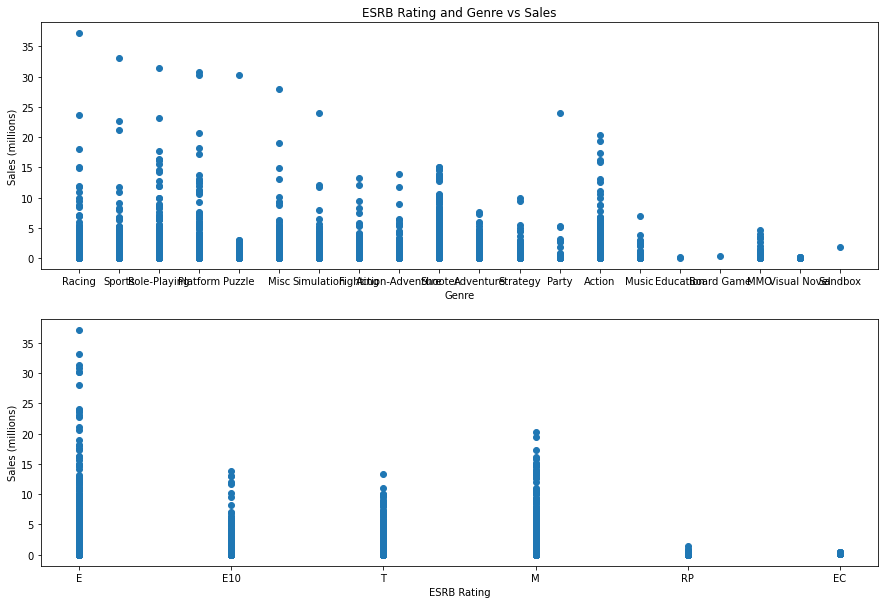

In [8]:
fig, axes = plt.subplots(2, figsize=(15, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_title("ESRB Rating and Genre vs Sales")
ax1.set_ylabel("Sales (millions)")
ax1.set_xlabel("Genre")
ax2.set_ylabel("Sales (millions)")
ax2.set_xlabel("ESRB Rating")
ax1.scatter(X, Y)
ax2.scatter(X2, Y)

<AxesSubplot:xlabel='ESRB_Rating', ylabel='Total_Sales'>

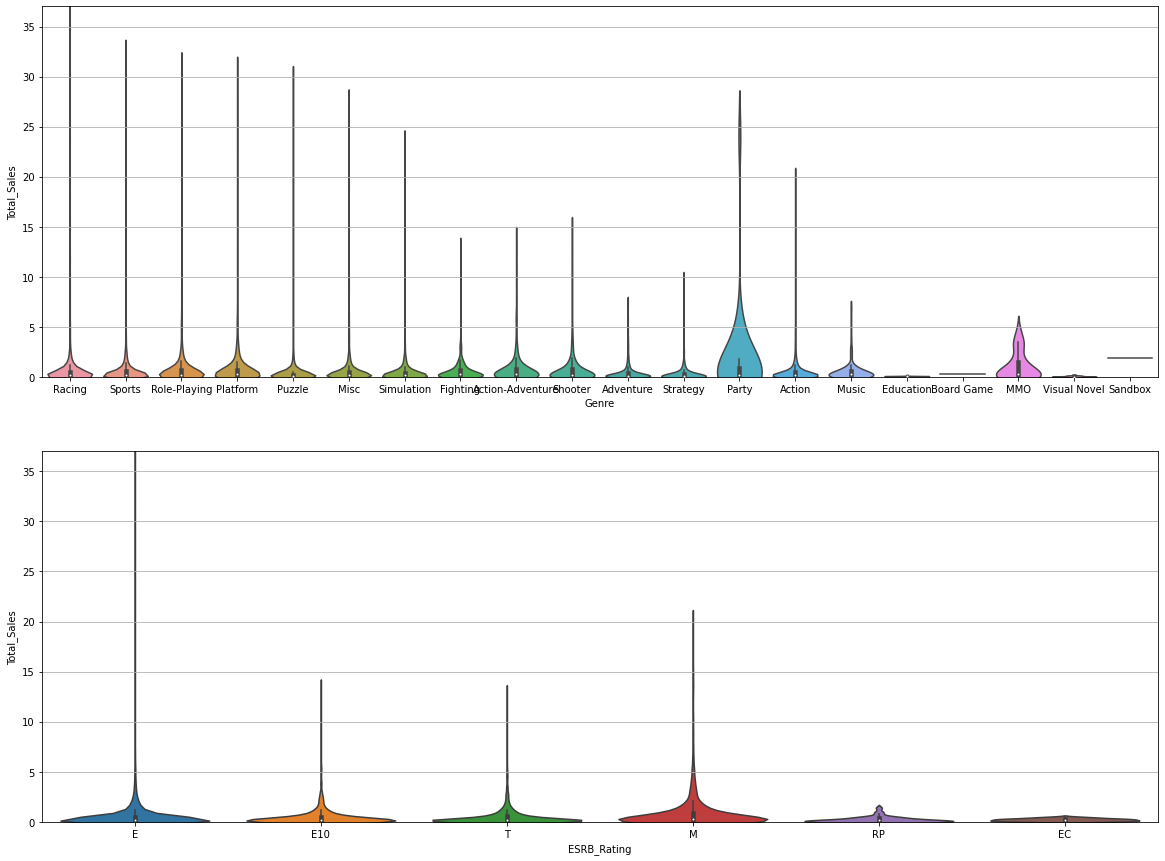

In [9]:
# genre_list = ESRB_df.Genre.unique().tolist()
# ESRB_list = ESRB_df.ESRB_Rating.unique().tolist()

# violin_genre = []
# violin_ESRB = []

# genre_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# ESRB_pos = [1,2,3,4,5,6]

# for i in genre_list:
#     violin_genre.append(ESRB_df[ESRB_df['Genre'] == i]['Total_Sales'].to_numpy())
    
# for i in ESRB_list:
#     violin_ESRB.append(ESRB_df[ESRB_df['ESRB_Rating'] == i]['Total_Sales'].to_numpy())

fig, axes = plt.subplots(2, figsize=(20, 15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.grid()
ax2.grid()
ax1.set_ylim(0, 37)
ax2.set_ylim(0, 37)
# ax1.set_xticks(genre_pos) 
# ax1.set_xticklabels(genre_list)
# ax2.set_xticks(ESRB_pos) 
# ax2.set_xticklabels(ESRB_list)
sns.violinplot(x='Genre', y='Total_Sales', data=ESRB_df, ax=ax1, scale='width')
# ax1.violinplot(violin_genre, genre_pos, widths=4, showmeans=True)
# ax2.violinplot(violin_ESRB, ESRB_pos, widths=4, showmeans=True)
sns.violinplot(x='ESRB_Rating', y='Total_Sales', data=ESRB_df, ax=ax2, scale='width')

# Genre Totals
New Column:
- Genre_Totals: Total sales per genre

In [10]:
df["Genre_Totals"] = df.groupby(["Genre"])["Total_Sales"].transform(sum)
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Publisher_Sales,Games_Produced,Avg_Sale,Genre_Totals
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,1988.48,753,2.640744,1464.10
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,1988.48,753,2.640744,999.94
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,1988.48,753,2.640744,806.64
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,1988.48,753,2.640744,1464.10
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,Japan,31.38,1988.48,753,2.640744,1142.91


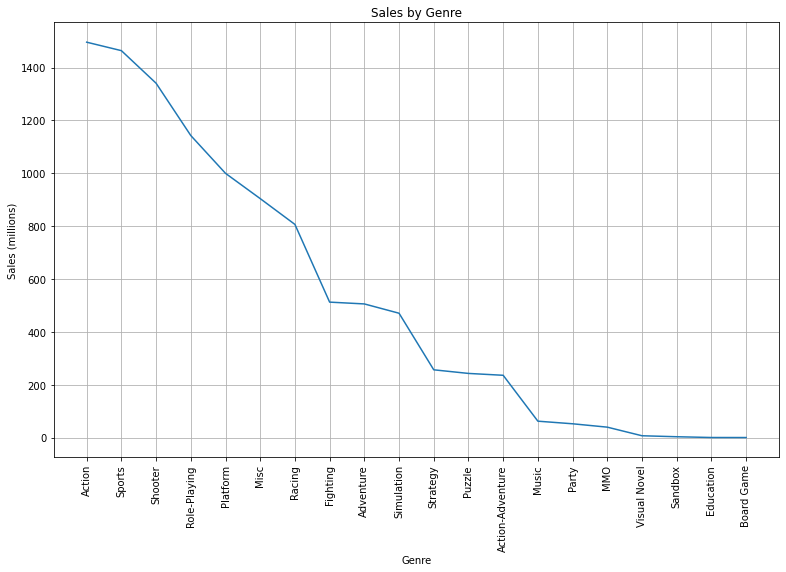

In [11]:
genre_df = df.sort_values(by=['Genre_Totals'], ascending=False)
X = genre_df['Genre']
Y = genre_df['Genre_Totals']

plt.figure(figsize=(13,8))
plt.title("Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales (millions)")
plt.grid()
plt.xticks(rotation='vertical')
plt.plot(X, Y)

# Year vs Sales

Green line of best fit for positive slope, red for negative slope.

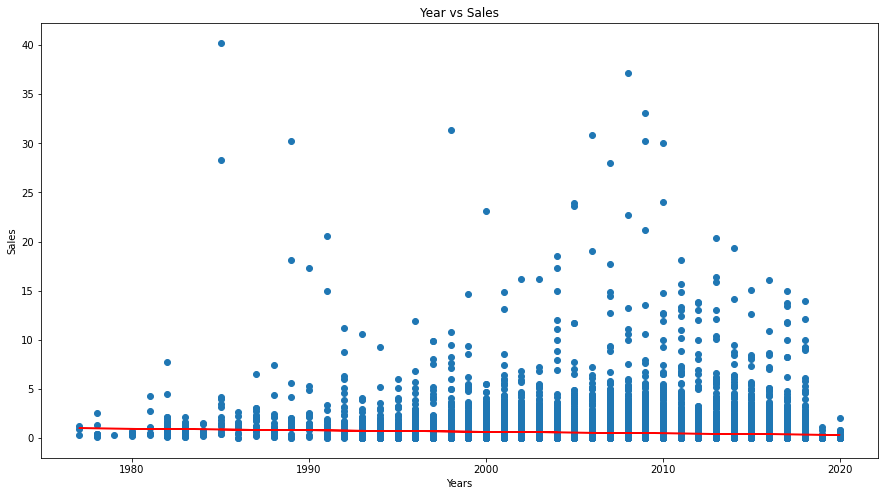

In [12]:
year_df = df.dropna(subset=['Year'])
year_df = year_df[year_df.Name != 'Wii Sports']
year_df = year_df[year_df.Publisher != 'PUBG Corporation']
year_df = year_df[year_df.Year != 1970]

X = year_df['Year']
Y = year_df['Total_Sales']
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X, Y)
m, b = np.polyfit(X, Y, 1) 
c = "r"
if (m>0):
    c = "g"
plt.plot(X, m*X + b, color=c)

Text(0.5, 1.0, 'Violin Sales by Year')

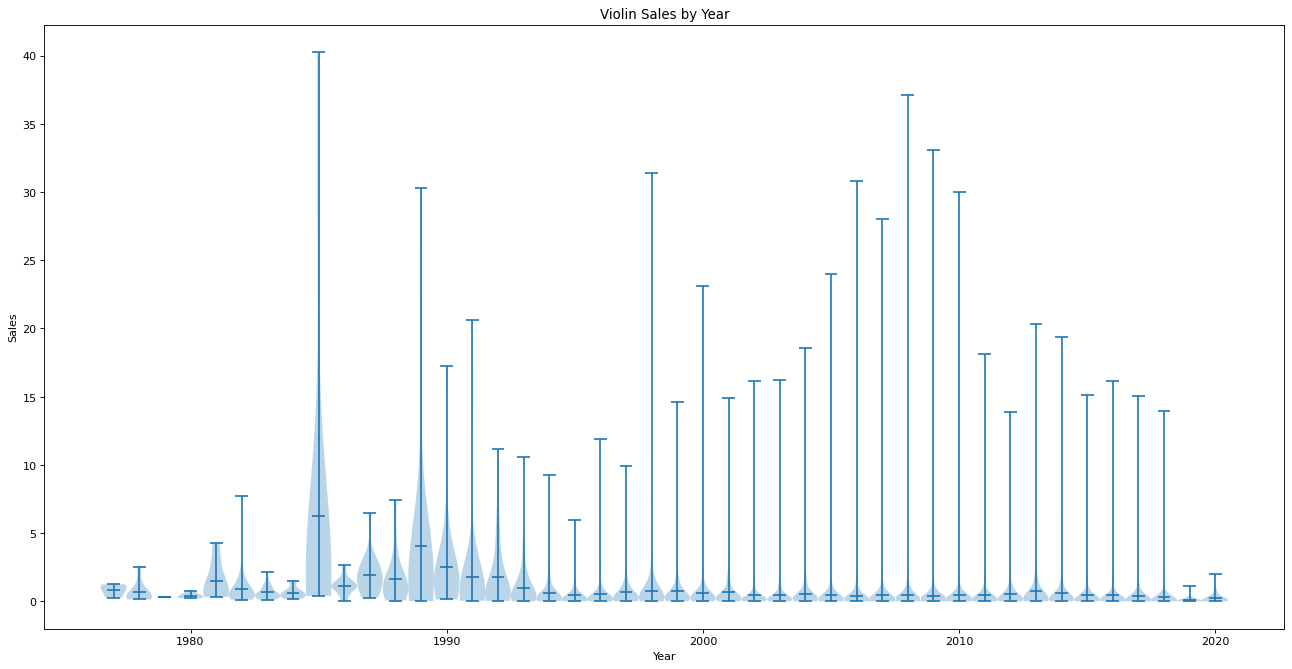

In [13]:
year_list = year_df.Year.unique()
violin_exp = []

for i in year_list:
    violin_exp.append(year_df[year_df['Year'] == i]['Total_Sales'].to_numpy())
    
# fig, ax = plt.subplots(figsize=(20,10))
# ax.set_title("Year vs Sales")
# ax.set_ylim(0, 50)
# sns.violinplot(x='Year', y='Total_Sales', data=year_df, ax=ax, scale='width')

plt.figure(figsize=(20, 10), dpi=80)
plt.violinplot(violin_exp, year_list, widths=1, showmeans=True) 
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Violin Sales by Year")

# Sales per Country
New Column:
- Country_Sales: Total sales per country

In [14]:
country_df = df.dropna(subset=['Country'])
country_df["Country_Sales"] = country_df.groupby(["Country"])["Total_Sales"].transform(sum)
country_df = country_df.sort_values(by=['Country_Sales', 'Total_Sales'], ascending=False)
country_df = country_df[country_df['Name'] != "Wii Sports"]
country_df.head()

<ipython-input-14-893066664cd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df["Country_Sales"] = country_df.groupby(["Country"])["Total_Sales"].transform(sum)


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Publisher_Sales,Games_Produced,Avg_Sale,Genre_Totals,Country_Sales
19,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,NaN,2013.0,United States,20.32,273.85,96,2.852604,1496.12,4568.15
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,2014.0,United States,19.39,273.85,96,2.852604,1496.12,4568.15
26,27,Grand Theft Auto: San Andreas,Action,M,PS2,Rockstar Games,Rockstar North,9.5,NaN,2004.0,United States,17.30,273.85,96,2.852604,1496.12,4568.15
30,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,NaN,2002.0,United States,16.15,273.85,96,2.852604,1496.12,4568.15
32,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Rockstar North,NaN,NaN,2013.0,United States,15.86,273.85,96,2.852604,1496.12,4568.15


Text(0.5, 1.0, 'Violin Sales by Country')

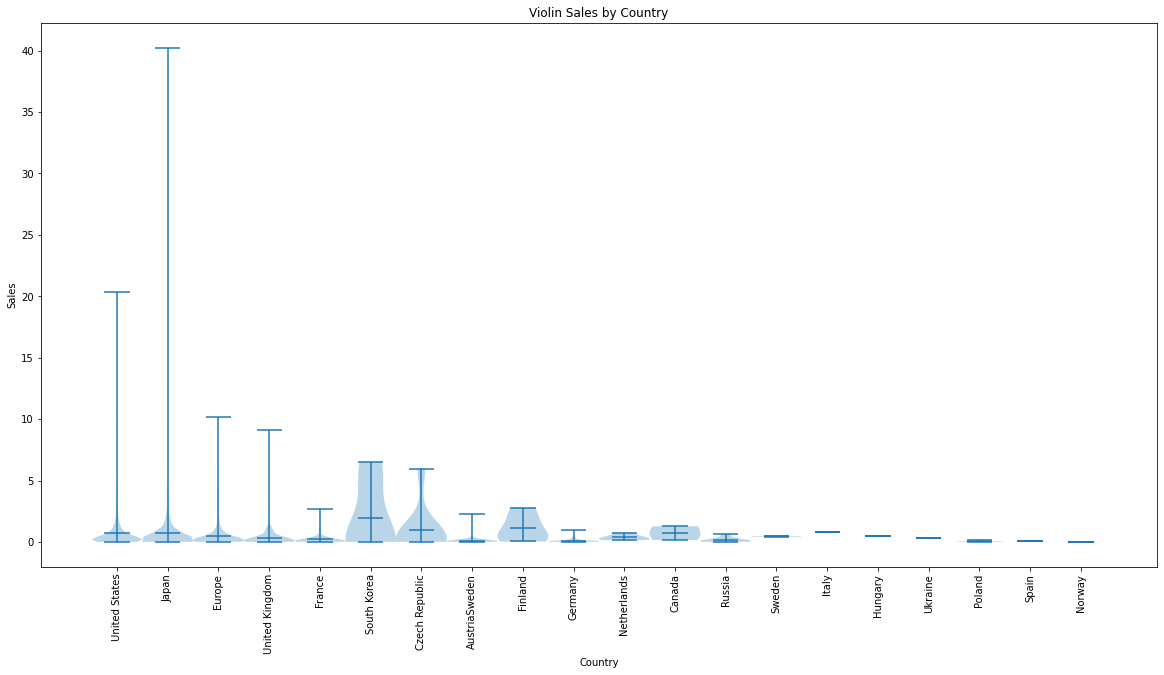

In [15]:
# fig, ax = plt.subplots(figsize=(20,10))
# ax.set_ylim(0, 42)
# sns.violinplot(x='Country', y='Total_Sales', data=country_df, ax=ax, scale='width')

country_list = country_df.Country.unique()
violin_country = []

for i in country_list:
    violin_country.append(country_df[country_df['Country'] == i]['Total_Sales'].to_numpy())
    
country_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(country_pos) 
ax.set_xticklabels(country_list, rotation='vertical')
plt.violinplot(violin_country, country_pos, widths=1, showmeans=True) 
ax.set_xlabel("Country")
ax.set_ylabel("Sales")
ax.set_title("Violin Sales by Country")

# Sales per Platform by Year
This is important to view because what if overall negative correlation of sales over time is because certain platforms are more negative than others? Are there any platforms with a positive correlation of sales over time?

Below I show the 10 most popular consoles, and then further explore if they could have a positive sales over time.

New Columns:
- Platform_Sales: Total sales per platform

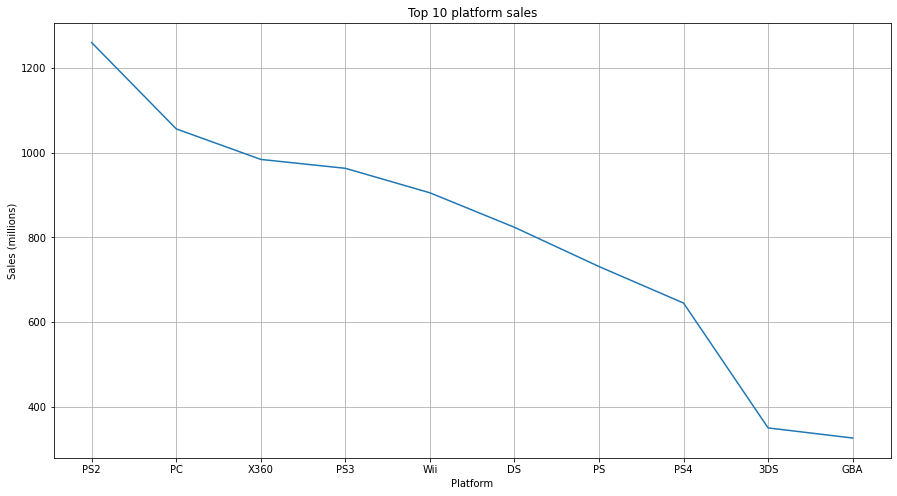

In [16]:
df["Platform_Sales"] = df.groupby(["Platform"])["Total_Sales"].transform(sum)
platform_df = df[['Platform', 'Platform_Sales']].drop_duplicates().sort_values(by=['Platform_Sales'], ascending=False)

top_platforms = platform_df.head(10)['Platform'].tolist()
plt.figure(figsize=(15,8))
plt.title("Top 10 platform sales")
plt.ylabel("Sales (millions)")
plt.xlabel("Platform")
plt.grid()
plt.plot(platform_df.head(10)['Platform'], platform_df.head(10)['Platform_Sales'])

# Probably will not include "Individual Game Sales per Platform" graph or "Average Game Sales per Platform", not very helpful

<AxesSubplot:title={'center':'Individual Game Sales per platform'}, xlabel='Platform', ylabel='Total_Sales'>

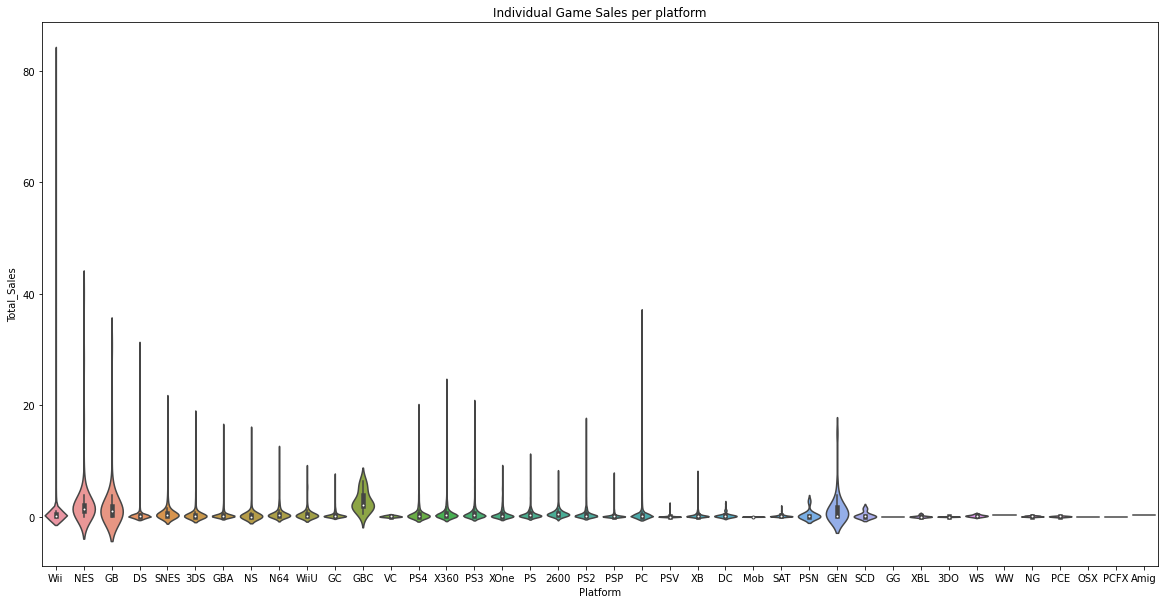

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Individual Game Sales per platform")
sns.violinplot(x='Platform', y='Total_Sales', data=df, ax=ax, scale='width')

<BarContainer object of 40 artists>

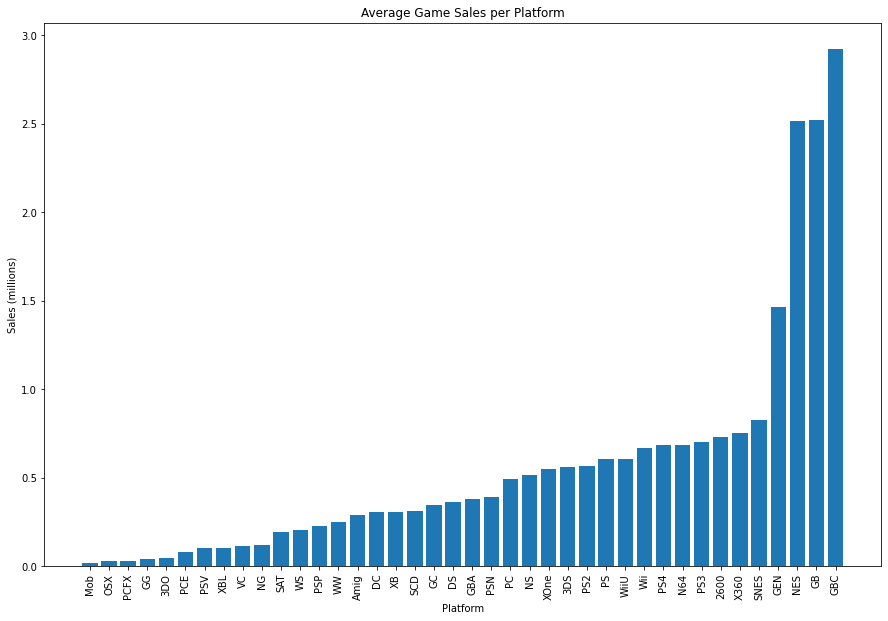

In [18]:
df['Platform_Games'] = df.groupby(['Platform'])['Total_Sales'].transform('count')
df['Avg_Platform'] = df.Platform_Sales / df.Platform_Games
df2 = df[['Platform', 'Avg_Platform']].drop_duplicates().sort_values(by=['Avg_Platform'])

plt.figure(figsize=(15,10))
plt.title("Average Game Sales per Platform")
plt.ylabel("Sales (millions)")
plt.xlabel("Platform")
plt.xticks(rotation='vertical')
plt.bar(df2['Platform'], df2['Avg_Platform'])
# df.head()

# Displaying the sales of the top 10 game platforms over time
As we can see, all the platforms have either a negative sales line over time or constant. This could simply be because the consoles are old, the PS2 was released in 2000 after all. Because it's only natural that game sales for such an old console would fall off over time, what about a newer console like the Nintendo Switch?

In [19]:
year_plat_df = df.sort_values(by=['Total_Sales'], ascending=False)
year_plat_df.dropna(subset=['Year'], inplace=True)
year_plat_df = year_plat_df[year_plat_df['Year'] != 1970]
year_plat_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Publisher_Sales,Games_Produced,Avg_Sale,Genre_Totals,Platform_Sales,Platform_Games,Avg_Platform
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,1988.48,753,2.640744,1464.10,905.10,1360,0.665515
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,1988.48,753,2.640744,999.94,256.34,102,2.513137
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,1988.48,753,2.640744,806.64,905.10,1360,0.665515
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60,36.60,1,36.600000,1340.85,1055.82,2142,0.492913
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,1988.48,753,2.640744,1464.10,905.10,1360,0.665515


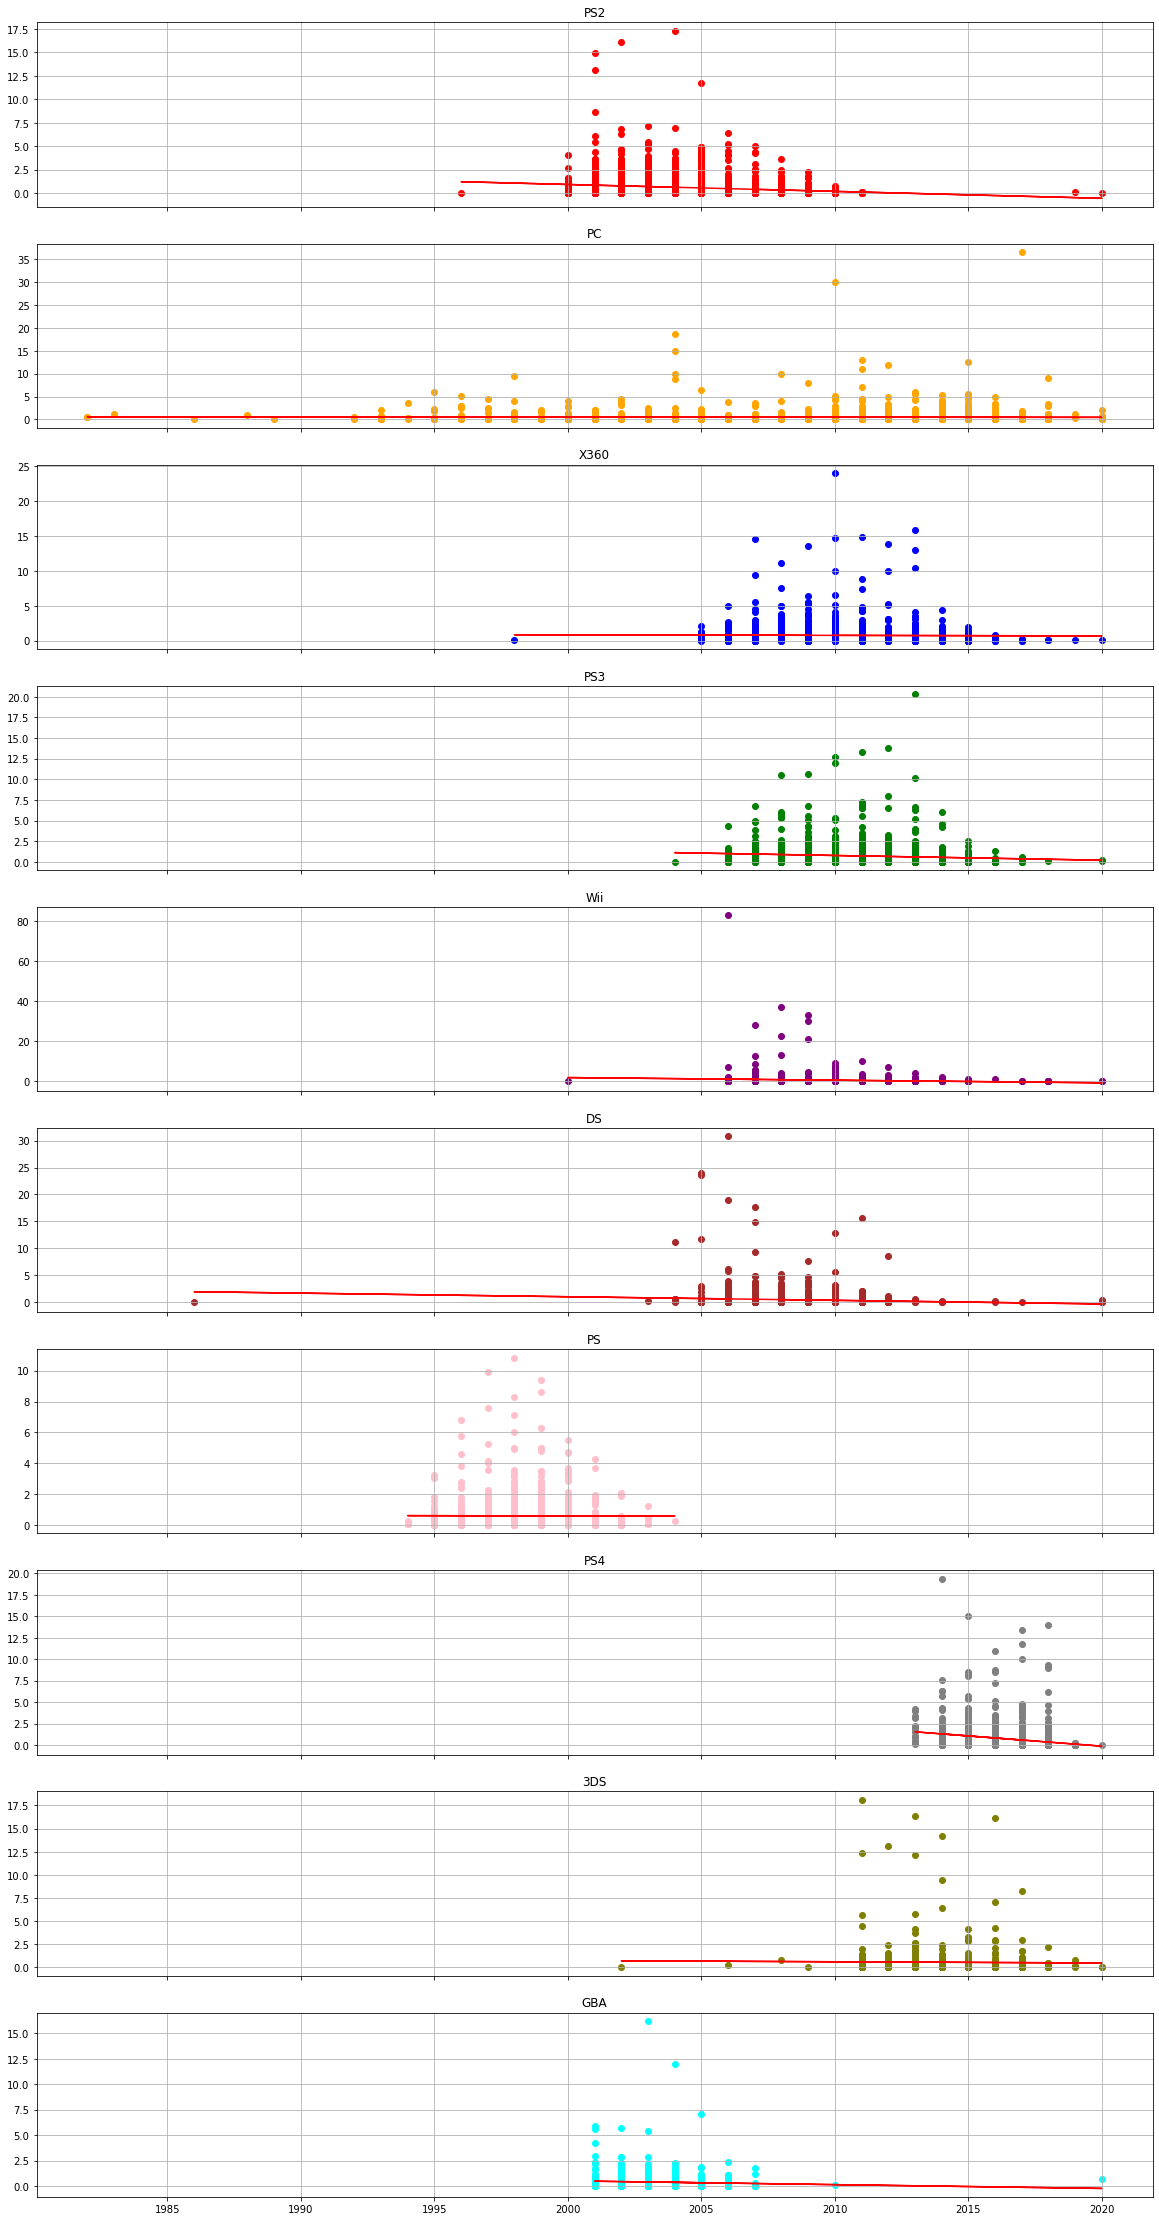

In [20]:
fig, ax = plt.subplots(10, figsize=(20, 40), sharex = True) 
colors = ['red', 'orange', 'blue', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(len(top_platforms)):
    x = year_plat_df[year_plat_df['Platform'] == top_platforms[i]]['Year']
    y = year_plat_df[year_plat_df['Platform'] == top_platforms[i]]['Total_Sales'].to_numpy() 
    ax[i].scatter(x, y).set_color(colors[i])
    ax[i].set_title(top_platforms[i])
    ax[i].grid()
    
    m, b = np.polyfit(x, y, 1) 
    c = "r"
    if (m>0):
        c = "g"
    ax[i].plot(x, m*x + b, color=c)

# Nintendo Switch sales analysis
As shown, even a newer console like the switch has sales that fall off after the first year.

Slope: -0.5194187575540602


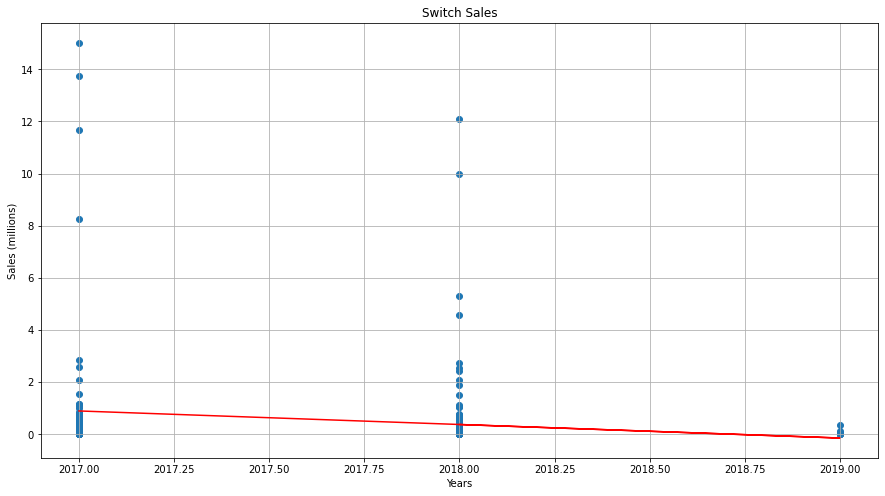

In [29]:
plt.figure(figsize=(15,8))
x = year_plat_df[year_plat_df['Platform'] == 'NS']['Year']
y = year_plat_df[year_plat_df['Platform'] == 'NS']['Total_Sales'].to_numpy() 
plt.scatter(x, y)
plt.title('Switch Sales')
plt.xlabel('Years')
plt.ylabel('Sales (millions)')
plt.grid()
m, b = np.polyfit(x, y, 1) 
c = "r"
if (m>0):
    c = "g"
plt.plot(x, m*x + b, color=c)
print("Slope:",m)

# New consoles are released regularly, but what about PC?
I assume from looking at the data that console excitement falls off fast with each new release - soon after Switch came PS5 and XBox Series X. However, PC is a constant that remains throughout the years and only improves over time. Do PC sales grow or remain constant over time?

As shown below even PC has a negative slope, though much smaller than the Switch.

Slope: -0.003257327117622823
Intercept: 7.04138050163448


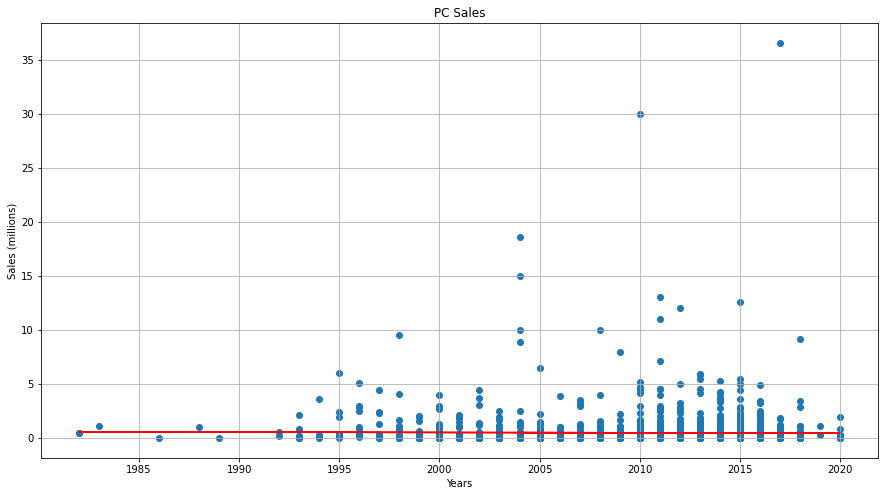

In [28]:
plt.figure(figsize=(15,8))
x = year_plat_df[year_plat_df['Platform'] == 'PC']['Year']
y = year_plat_df[year_plat_df['Platform'] == 'PC']['Total_Sales'].to_numpy() 
plt.scatter(x, y)
plt.title('PC Sales')
plt.xlabel('Years')
plt.ylabel('Sales (millions)')
plt.grid()
m, b = np.polyfit(x, y, 1) 
c = "r"
if (m>0):
    c = "g"
  
plt.plot(x, m*x + b, color=c)
print("Slope:", m)
print("Intercept:", b)